In [1]:
# Importing needed packages for data analysis
import pandas as pd
import numpy as np

In [2]:
#loading the dataset
df = pd.read_csv('Data_for_UCI_named.csv', low_memory=False)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
# The dataset has 10000 rows and 14 columns
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
# Checking for missing values
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [6]:
# Having a look at the target column
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [7]:
# Dropping the stab column as direccted 
df.drop('stab', axis = 1, inplace = True)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [8]:
#Seperating the X and Y features
X = df.drop(columns='stabf')
y = df['stabf']

In [9]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [10]:
# Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

x_train_scaled

array([[ 0.36732671, -0.98604156,  0.65044706, ...,  0.33985949,
         0.58556788,  0.49223946],
       [-0.06465869,  0.08943734,  1.03507899, ..., -1.5584875 ,
         1.42964862, -1.44352101],
       [-1.46785   ,  1.29841758, -0.50253617, ...,  1.45153362,
        -1.04574277,  0.49248925],
       ...,
       [ 0.65760851, -0.72275633, -1.4058879 , ...,  0.29310048,
        -1.55058661,  0.81034412],
       [-0.05931596, -1.26053241, -1.01047147, ..., -0.38825455,
        -0.72678059,  1.66791568],
       [-1.47321368,  0.63843757,  0.25012249, ..., -1.17410957,
         1.179282  ,  0.78362657]])

In [11]:
# Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=1)
rnd_clf.fit(x_train_scaled, y_train)
y_pred_rf = rnd_clf.predict(x_test_scaled)

In [12]:
from sklearn.metrics import classification_report
#classification report
print(classification_report(y_test, y_pred_rf, digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [13]:
# Xgboost classifier
from xgboost import XGBRFClassifier
extreme = XGBRFClassifier(max_depth=3,learning_rate=0.1, random_state=1)
extreme.fit(x_train_scaled, y_train)
extreme_pred = extreme.predict(x_test_scaled)

C:\Users\ADMIN\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
#classification report
print(classification_report(y_test, extreme_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.8531    0.5871    0.6955       712
    unstable     0.8053    0.9441    0.8692      1288

    accuracy                         0.8170      2000
   macro avg     0.8292    0.7656    0.7823      2000
weighted avg     0.8223    0.8170    0.8074      2000



In [17]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(random_state=1)
tree.fit(x_train_scaled, y_train)
tree_pred = tree.predict(x_test_scaled)

In [18]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [20]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(tree, hyperparameter_grid, random_state=1)
search = clf.fit(x_train_scaled, y_train)

In [21]:
#checking for the best parameter for the model
search.best_params_.values()

dict_values([1000, 2, 8, None])

[0.11861514 0.1181451  0.11357162 0.11876641 0.03926566 0.04051689
 0.03944441 0.03978386 0.0892179  0.09278578 0.09720316 0.09268407]


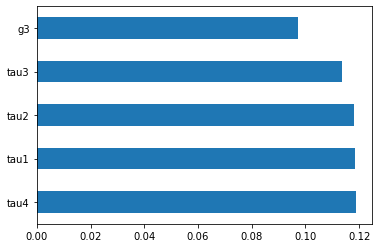

In [22]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()